In [1]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
    print("Baixando Funções que serão usadas nesse notebook")
    ! shred -u astroFunctions.py
    ! wget https://raw.githubusercontent.com/rafaelmgr12/PHOTOzxcorr/main/functions/ml_algorithims.py -O ml_algorithims.py
    ! pip install healpy
    from google.colab import drive
    drive.mount('/content/drive')
else:
    import sys,os
    home = os.getenv("HOME")
    sys.path.append(home+"/Projetos/master-thesis/functions/") # user here the path where we download the folder PHTOzxcorr

In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import ml_algorithims as ml
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split,ShuffleSplit
# Neural Network Libs

import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras import backend as K
from sklearn.metrics import confusion_matrix
import keras as ks
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [3]:
def rmse_ann3(y_true, y_pred):
    diff = keras.backend.square(
        (y_pred - y_true))
    return keras.backend.sqrt(keras.backend.mean(diff))
def create_bins(lower_bound, width, quantity):
    """ create_bins returns an equal-width (distance) partitioning. 
        It returns an ascending list of tuples, representing the intervals.
        A tuple bins[i], i.e. (bins[i][0], bins[i][1])  with i > 0 
        and i < quantity, satisfies the following conditions:
            (1) bins[i][0] + width == bins[i][1]
            (2) bins[i-1][0] + width == bins[i][0] and
                bins[i-1][1] + width == bins[i][1]
    """
    

    bins = []
    for low in range(lower_bound, 
                     lower_bound + quantity*width + 1, width):
        bins.append((low, low+width))
    return np.asrraty(bins)


In [4]:
data = Table.read("/home/rafael/Projetos/master-thesis/data/vipers.fits").to_pandas()

In [5]:
feat = ['MAG_AUTO_G','MAG_AUTO_R','MAG_AUTO_I','MAG_AUTO_Z','MAG_AUTO_Y',
        'MAG_AUTO_G_DERED','MAG_AUTO_R_DERED','MAG_AUTO_I_DERED','MAG_AUTO_Z_DERED','MAG_AUTO_Y_DERED',
        "WAVG_MAG_PSF_G","WAVG_MAG_PSF_R","WAVG_MAG_PSF_I","WAVG_MAG_PSF_Z","WAVG_MAG_PSF_Y"
       ,'WAVG_MAG_PSF_G_DERED','WAVG_MAG_PSF_R_DERED','WAVG_MAG_PSF_I_DERED','WAVG_MAG_PSF_Z_DERED','WAVG_MAG_PSF_Y_DERED']


In [6]:
data.loc[data[feat[0]]==99,feat[0]] = data[data[feat[0]]!=99][feat[0]].max()
data.loc[data[feat[1]]==99,feat[1]] = data[data[feat[1]]!=99][feat[1]].max()
data.loc[data[feat[2]]==99,feat[2]] = data[data[feat[2]]!=99][feat[2]].max()
data.loc[data[feat[3]]==99,feat[3]] = data[data[feat[3]]!=99][feat[3]].max()
data.loc[data[feat[4]]==99,feat[4]] = data[data[feat[4]]!=99][feat[4]].max()
data.loc[data[feat[5]]>90,feat[5]] = data[data[feat[5]]<90][feat[5]].max()
data.loc[data[feat[6]]>90,feat[6]] = data[data[feat[6]]<90][feat[6]].max()
data.loc[data[feat[7]]>90,feat[7]] = data[data[feat[7]]<90][feat[7]].max()
data.loc[data[feat[8]]>90,feat[8]] = data[data[feat[8]]<90][feat[8]].max()
data.loc[data[feat[9]]>90,feat[9]] = data[data[feat[9]]<90][feat[9]].max()
data.loc[data[feat[10]]>90,feat[10]] = data[data[feat[10]]<90][feat[10]].max()
data.loc[data[feat[11]]>90,feat[11]] = data[data[feat[11]]<90][feat[11]].max()
data.loc[data[feat[12]]>90,feat[12]] = data[data[feat[12]]<90][feat[12]].max()
data.loc[data[feat[13]]>90,feat[13]] = data[data[feat[13]]<90][feat[13]].max()
data.loc[data[feat[14]]>90,feat[14]] = data[data[feat[14]]<90][feat[14]].max()
data.loc[data[feat[15]]>90,feat[15]] = data[data[feat[15]]<90][feat[15]].max()
data.loc[data[feat[16]]>90,feat[16]] = data[data[feat[16]]<90][feat[16]].max()
data.loc[data[feat[17]]>90,feat[17]] = data[data[feat[17]]<90][feat[17]].max()
data.loc[data[feat[18]]>90,feat[18]] = data[data[feat[18]]<90][feat[18]].max()
data.loc[data[feat[19]]>90,feat[19]] = data[data[feat[19]]<90][feat[19]].max()

In [7]:
X,y = ml.get_features_targets_des2(data)
y = y.reshape(-1,1)

In [8]:
X.shape

(47658, 5)

In [9]:
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(200,encode = "onehot",strategy = "uniform")
kbins.fit(y.reshape(-1,1))
y_bins = kbins.transform(y.reshape(-1,1))


In [10]:
from scipy.sparse import hstack,vstack

In [11]:
y_total = hstack([y_bins,y])
y_total.shape

(47658, 201)

In [12]:
y_total = y_total.toarray()

In [13]:
# concatenate the mag for plot purpose only

X = np.concatenate((X,data[['MAG_AUTO_G_DERED','MAG_AUTO_R_DERED','MAG_AUTO_I_DERED','MAG_AUTO_Z_DERED','MAG_AUTO_Y_DERED',]].values),axis = 1 )

In [14]:
X.shape

(47658, 10)

In [15]:
X_train,X_test,y_train,y_test = ml.tts_split(X,y_total,0.3,5)

In [16]:
n_inputs = X_train.shape[1]
n_inputs

10

In [17]:
EarlyStop = EarlyStopping(monitor='reg_mse', mode='min', patience=20)
BATCH_SIZE = 64
STEPS_PER_EPOCH = len(data)//BATCH_SIZE
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
        0.0001,
        decay_steps=STEPS_PER_EPOCH*1000,
        decay_rate=1,
        staircase=False)

In [18]:
inputs = keras.layers.Input(5)
x = BatchNormalization()(inputs)
x = Dense(20, kernel_initializer='normal',  kernel_constraint=max_norm(2.) ,activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)) (x)
x = BatchNormalization()(x)
x = Dense(15, kernel_initializer='normal',  kernel_constraint=max_norm(2.) ,activation='tanh',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)) (x)
x = BatchNormalization()(x)
x = Dense(10, kernel_initializer='normal',  kernel_constraint=max_norm(2.) ,activation='elu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
                              bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5)) (x)
output1 = Dense(1,activation = "linear",name = "reg") (x)
output2 = Dense(200,activation = "softmax",name ="pdf")(x)
model = keras.Model(inputs=inputs, outputs=[output1,output2], name="rafael")

In [19]:
model.summary()

Model: "rafael"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 5)            20          input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 20)           120         batch_normalization[0][0]        
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 20)           80          dense[0][0]                      
_____________________________________________________________________________________________

In [20]:
#opt = ks.optimizers.Adamax(lr_schedule)
opt = ks.optimizers.RMSprop(lr_schedule)
model.compile(
    loss={'reg': 'mean_absolute_error', 
                    'pdf': keras.losses.CategoricalCrossentropy()},loss_weights=[0.1,0.9],
              optimizer=opt,
              
    metrics={'pdf': "acc",
                      'reg': "mse"})

In [21]:
history = model.fit(X_train[:,:5], {'pdf': y_train[:,:200], 'reg': y_train[:,200]}, batch_size = 64,epochs=256,validation_split = 0.2, callbacks=[EarlyStop])

Epoch 1/256
417/417 [==============================] - 4s 4ms/step - loss: 4.8031 - reg_loss: 0.6560 - pdf_loss: 5.2635 - reg_mse: 0.5408 - pdf_acc: 0.0268 - val_loss: 4.7074 - val_reg_loss: 0.4170 - val_pdf_loss: 5.1836 - val_reg_mse: 0.2323 - val_pdf_acc: 0.0646
Epoch 2/256
417/417 [==============================] - 1s 2ms/step - loss: 4.6007 - reg_loss: 0.3467 - pdf_loss: 5.0729 - reg_mse: 0.1877 - pdf_acc: 0.0563 - val_loss: 4.3622 - val_reg_loss: 0.1605 - val_pdf_loss: 4.8284 - val_reg_mse: 0.0489 - val_pdf_acc: 0.0622
Epoch 3/256
417/417 [==============================] - 1s 2ms/step - loss: 4.2831 - reg_loss: 0.1490 - pdf_loss: 4.7418 - reg_mse: 0.0404 - pdf_acc: 0.0573 - val_loss: 4.0109 - val_reg_loss: 0.1336 - val_pdf_loss: 4.4408 - val_reg_mse: 0.0321 - val_pdf_acc: 0.0628
Epoch 4/256
417/417 [==============================] - 1s 2ms/step - loss: 3.9436 - reg_loss: 0.1121 - pdf_loss: 4.3683 - reg_mse: 0.0260 - pdf_acc: 0.0572 - val_loss: 3.7165 - val_reg_loss: 0.1237 - val_p

In [22]:
test_predictions = model.predict(X_test[:,:5])


print("Testing set Mean Abs Error: {:5.4f} ".format(mean_absolute_error(y_test[:,200],test_predictions[0])))
print("\n")
print("Testing set Mean Square Error: {:5.4f} ".format(mean_squared_error(y_test[:,200],test_predictions[0])))
print("\n")
print("Testing set Root Mean Square Error: {:5.4f} ".format(np.sqrt(mean_squared_error(y_test[:,200],test_predictions[0]))))

Testing set Mean Abs Error: 0.0902 


Testing set Mean Square Error: 0.0198 


Testing set Root Mean Square Error: 0.1407 


In [23]:
zspec = y_test[:,200].flatten()
zphot = test_predictions[0].flatten()
pdf = test_predictions[1]
x_plot = np.linspace(0,3.5,200)

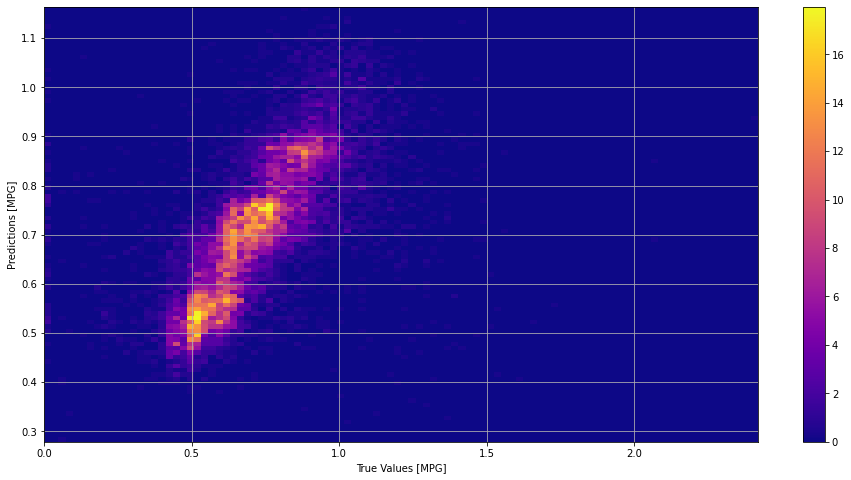

In [24]:
plt.figure(figsize=(16, 8))
plt.hist2d(zspec,zphot, bins= 100,density=True,cmap = "plasma")
plt.colorbar()
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.grid()
#plt.show()
plt.savefig("plots/ann_hist2d.png")
#plt.close()

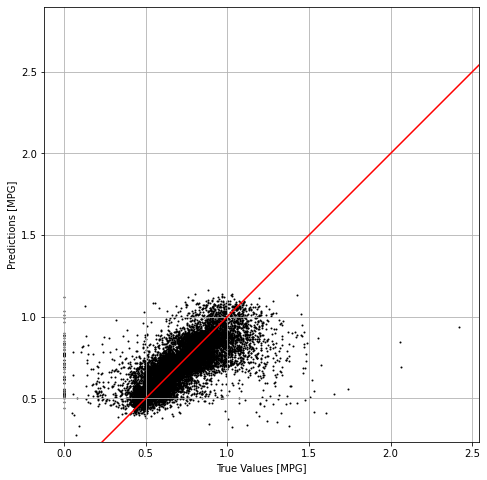

In [25]:
plt.figure(figsize=(16, 8))
plt.scatter(zspec, zphot, s=1, c="k")
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.grid()
_ = plt.plot([-100, 100], [-100, 100],color = "red")
#plt.show()
plt.savefig("plots/scatter_ann.png",dpi = 300)
#plt.close()


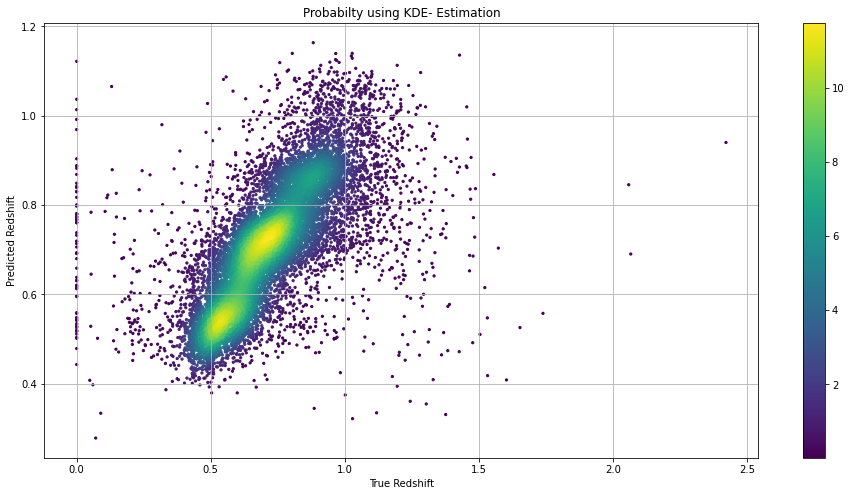

In [26]:
from scipy.stats import gaussian_kde
plt.figure(figsize=(16,8))
plt.title("Probabilty using KDE- Estimation")
xy = np.hstack([zspec.reshape(-1,1),zphot.reshape(-1,1)]).T
z = gaussian_kde(xy)(xy)
plt.scatter(zspec,zphot,c=z,s=5,cmap = "viridis")
plt.xlabel("True Redshift")
plt.ylabel("Predicted Redshift")
plt.grid()
plt.colorbar()
plt.savefig("plots/scatter_probs_ann_rafael.png",dpi =300)

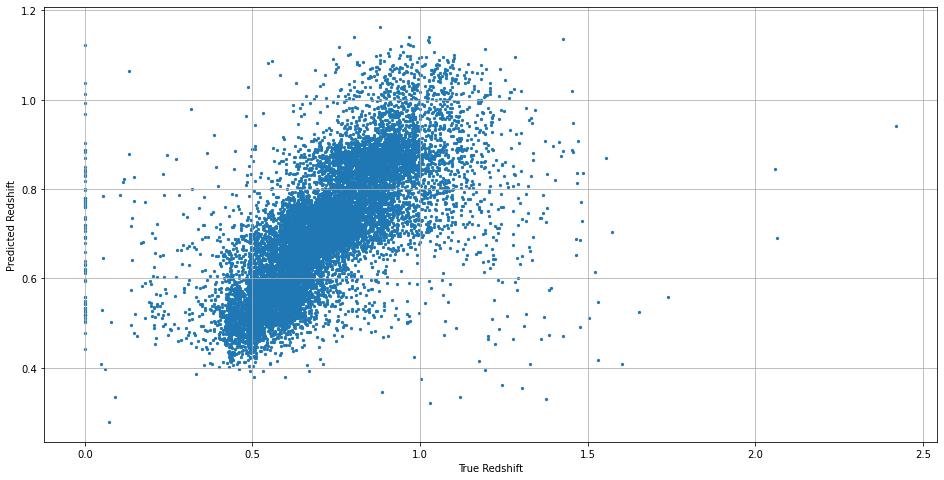

In [27]:
plt.figure(figsize=(16,8))
plt.scatter(zspec,zphot,s=5,cmap = "viridis")
plt.xlabel("True Redshift")
plt.ylabel("Predicted Redshift")
plt.grid()
plt.savefig("plots/scatter.ann_rafael.png",dpi =300)

In [28]:
redshift = pd.DataFrame()
redshift["z_phot"] = zphot
redshift["z_spec"] = zspec

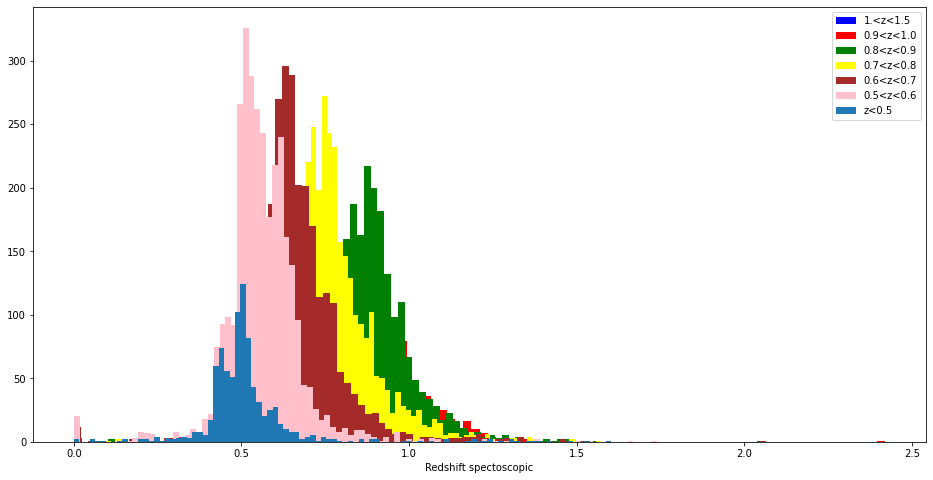

In [29]:
plt.figure(figsize=(16,8))
plt.hist(redshift[(redshift["z_phot"] > 1.) & (redshift["z_phot"] < 1.5)]["z_spec"].values,label = "1.<z<1.5",bins = 100, color = "b")
plt.hist(redshift[(redshift["z_phot"] > 0.9) & (redshift["z_phot"] < 1.)]["z_spec"].values,label = "0.9<z<1.0",bins = 100,color = "r")
plt.hist(redshift[(redshift["z_phot"] > 0.8) & (redshift["z_phot"] < 0.9)]["z_spec"].values,label = "0.8<z<0.9",bins = 100,color = "g")
plt.hist(redshift[(redshift["z_phot"] > 0.7) & (redshift["z_phot"] < 0.8)]["z_spec"].values,label = "0.7<z<0.8",bins = 100,color = "yellow")
plt.hist(redshift[(redshift["z_phot"] > 0.6) & (redshift["z_phot"] < 0.7)]["z_spec"].values,label = "0.6<z<0.7",bins = 100,color = "brown")
plt.hist(redshift[(redshift["z_phot"] > 0.5) & (redshift["z_phot"] < 0.6)]["z_spec"].values,label = "0.5<z<0.6",bins = 100,color = "pink")
plt.hist(redshift[redshift["z_phot"] < 0.5]["z_spec"].values,label = "z<0.5",bins = 100)
plt.xlabel("Redshift spectoscopic")
plt.legend()

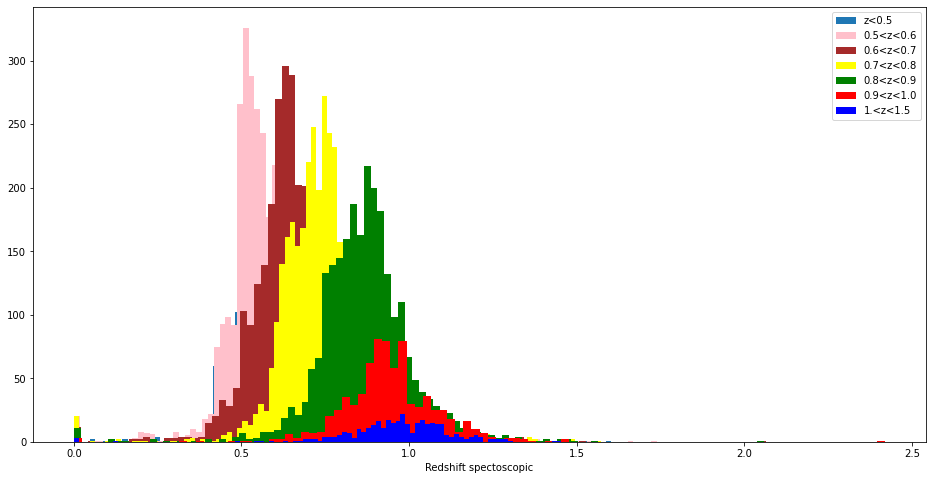

In [30]:
plt.figure(figsize=(16,8))
plt.hist(redshift[redshift["z_phot"] < 0.5]["z_spec"].values,label = "z<0.5",bins = 100)
plt.hist(redshift[(redshift["z_phot"] > 0.5) & (redshift["z_phot"] < 0.6)]["z_spec"].values,label = "0.5<z<0.6",bins = 100,color = "pink" )
plt.hist(redshift[(redshift["z_phot"] > 0.6) & (redshift["z_phot"] < 0.7)]["z_spec"].values,label = "0.6<z<0.7",bins = 100,color = "brown")
plt.hist(redshift[(redshift["z_phot"] > 0.7) & (redshift["z_phot"] < 0.8)]["z_spec"].values,label = "0.7<z<0.8",bins = 100,color = "yellow")
plt.hist(redshift[(redshift["z_phot"] > 0.8) & (redshift["z_phot"] < 0.9)]["z_spec"].values,label = "0.8<z<0.9",bins = 100,color = "g")
plt.hist(redshift[(redshift["z_phot"] > 0.9) & (redshift["z_phot"] < 1.)]["z_spec"].values,label = "0.9<z<1.0",bins = 100,color = "r")
plt.hist(redshift[(redshift["z_phot"] > 1.) & (redshift["z_phot"] < 1.5)]["z_spec"].values,label = "1.<z<1.5",bins = 100,color = "b")
plt.xlabel("Redshift spectoscopic")
plt.legend()

In [31]:
error = (zphot - zspec)

In [32]:
redshift ["error"] = error 

In [33]:
sigma68 = (int(len(error)*0.159),int(len(error)*(1-0.159)))
sigma68

(2273, 12024)

In [34]:
err = np.sort(error)

In [35]:
sigma68 = (int(len(err)*0.159),int(len(err)*(1-0.159)))

print("$\sigma_{68}$ error is ", err[sigma68[0]],err[sigma68[1]])

$\sigma_{68}$ error is  -0.10133207 0.08831406


In [36]:
sigma68_arr = err[2273:12024]

In [37]:
x = np.array(range(0,20+1))*5
x[0]=1

ind = x*len(error)//100

In [38]:
x = np.array(range(0,20+1))*5
x[0]=1

ind = x*len(sigma68_arr)//100

Text(0, 0.5, '$\\sigma_{68}$')

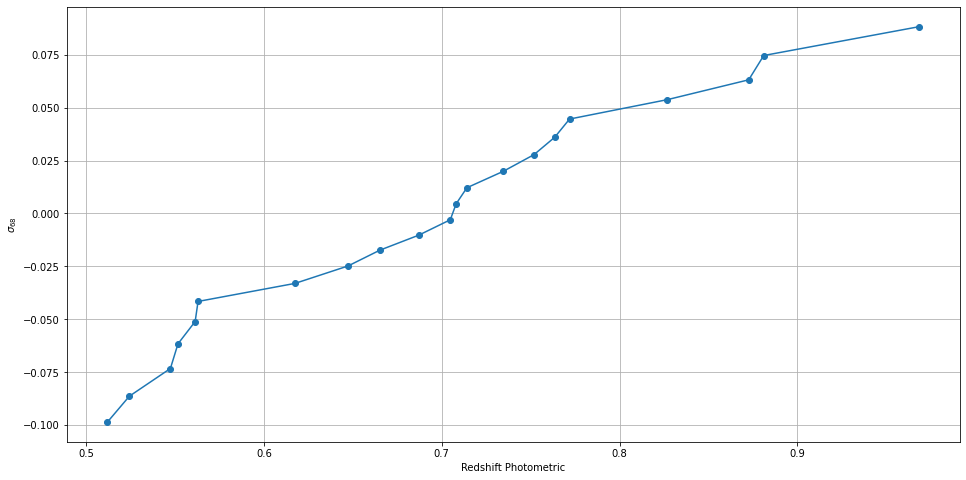

In [39]:
plt.figure(figsize = (16,8))
plt.plot(np.sort(zphot[ind-1]),sigma68_arr[ind-1],'o-')
#plt.scatter(test.z_phot[ind-1],test.error[ind-1],s = 10, c = "red")
plt.grid()
plt.xlabel("Redshift Photometric")
plt.ylabel("$\sigma_{68}$")


In [40]:
bins = []
j = 0.5
for i in range(20):
    j = j + 0.05
    b = (zphot>(j-0.05)) & (zphot<j)
    bins.append(b)

In [41]:
bins.insert(0,zphot<(0.5))

In [42]:
print("Object in each bins: ")
for i in range(len(bins)):
    print("bin"+str(i)+" :",zphot[bins[i]].shape[0])

Object in each bins: 
bin0 : 859
bin1 : 1619
bin2 : 1535
bin3 : 1145
bin4 : 1761
bin5 : 2186
bin6 : 1590
bin7 : 1109
bin8 : 1377
bin9 : 480
bin10 : 290
bin11 : 203
bin12 : 124
bin13 : 19
bin14 : 1
bin15 : 0
bin16 : 0
bin17 : 0
bin18 : 0
bin19 : 0
bin20 : 0


In [43]:
import metrics

In [44]:
results = []
for i in range((10)):
    aux = metrics.compute_metrics(zspec[bins[i]],zphot[bins[i]],"ANN-rafael-bins"+str(i))
    aux = aux.to_frame()
    results.append(aux)
    del aux


In [45]:
df = pd.concat(results,ignore_index=False,axis = 1)

In [46]:
df

,ANN-rafael-bins0,ANN-rafael-bins1,ANN-rafael-bins2,ANN-rafael-bins3,ANN-rafael-bins4,ANN-rafael-bins5,ANN-rafael-bins6,ANN-rafael-bins7,ANN-rafael-bins8,ANN-rafael-bins9
RMSE_znorm,0.090500,0.085598,0.070719,0.085716,0.084832,0.080627,0.103781,0.103074,0.083496,0.081454
bias_znorm,-0.022426,-0.002952,-0.002078,0.010585,0.005842,0.000904,0.002990,-0.003544,0.002608,-0.000238
std_znorm,0.087677,0.085547,0.070689,0.085060,0.084631,0.080622,0.103738,0.103014,0.083456,0.081453
RMSE,0.171064,0.126428,0.113516,0.128693,0.139893,0.133550,0.149573,0.159399,0.133602,0.153057
|znorm| > 0.15 (%),7.334109,5.250154,3.127036,4.192140,5.905735,4.803294,5.031447,5.770965,3.631082,3.750000
|znorm| > 3std (%),3.725262,2.408894,2.084691,2.358079,1.533220,1.235133,1.320755,1.262399,1.016703,0.833333
scatter,0.090500,0.085598,0.070719,0.085716,0.084832,0.080627,0.103781,0.103074,0.083496,0.081454
bias,0.052765,0.049070,0.046211,0.050506,0.056180,0.052946,0.057327,0.058480,0.050386,0.051768
fr015,92.665891,94.749846,96.872964,95.807860,94.094265,95.196706,94.968553,94.229035,96.368918,96.250000
sigma68,0.071402,0.073445,0.075156,0.083076,0.100100,0.102209,0.109273,0.107331,0.103457,0.112999


In [47]:
stack = []
for i in range(len(bins)):
    stack.append(pdf[bins[i],:])


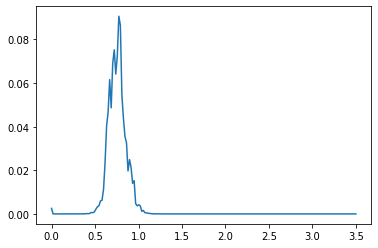

In [48]:
plt.plot(x_plot,pdf[0,:])

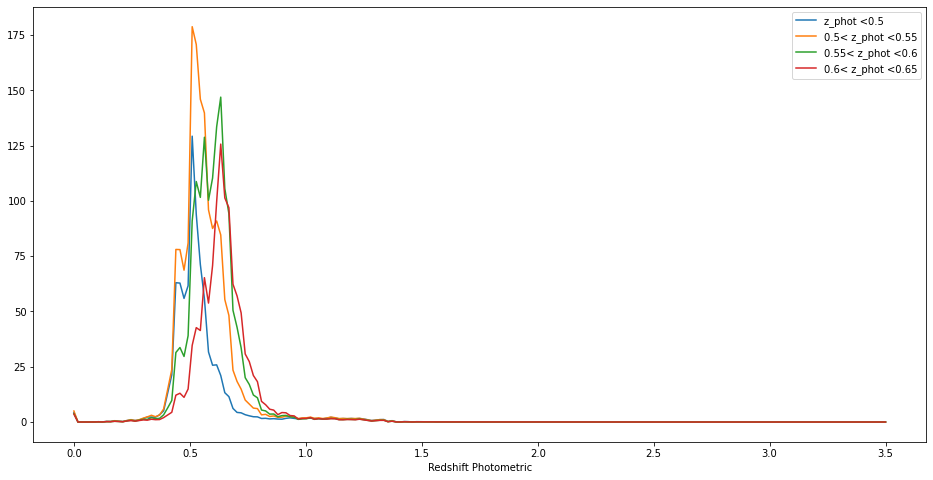

In [49]:
plt.figure(figsize=(16,8))
#plt.title("PDF Stacked with bins")
j = 0.5
plt.plot(x_plot,np.sum(stack[0],axis = 0),label = "z_phot <0.5")
for i in range(3):
    j = j + 0.05
    st1 = round(j-0.05,3)
    st2 = round(j,3)
    plt.plot(x_plot,np.sum(stack[i+1],axis = 0),label = str(st1)+"< z_phot <"+str(st2))
plt.legend()
plt.xlabel("Redshift Photometric")
plt.savefig("plots/pdf_stacked_phot.png",dpi = 500)

In [50]:
bins_spec = []
j = 0.5
for i in range(20):
    j = j + 0.05
    b = (zspec>(j-0.05)) & (zspec<j)
    bins_spec.append(b)
bins_spec.insert(0,zspec<(0.5))
stack_spec = []
for i in range(len(bins_spec)):
    stack_spec.append(pdf[bins_spec[i],:])

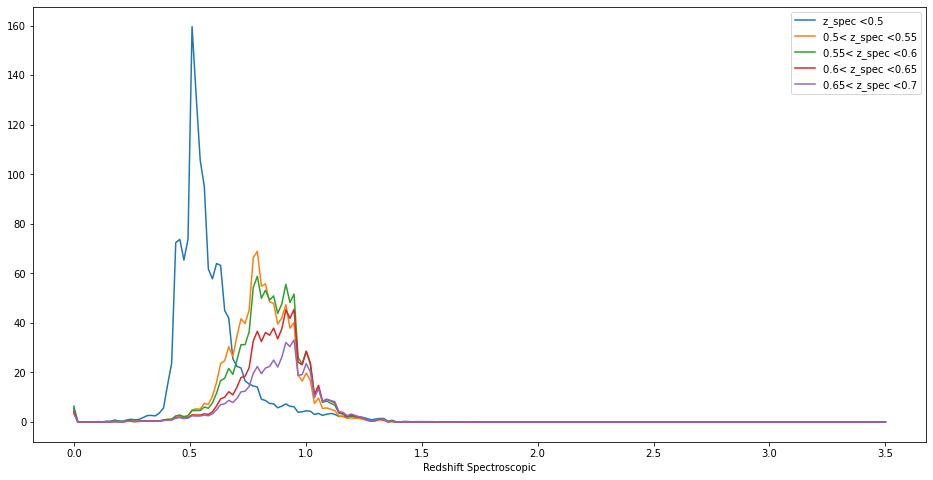

In [51]:
plt.figure(figsize=(16,8))
#plt.title("PDF Stacked with bins")
plt.plot(x_plot,np.sum(stack_spec[0],axis = 0),label = "z_spec <0.5")
j = 0.5
for i in range(6,10):
    j = j + 0.05
    st1 = round(j-0.05,3)
    st2 = round(j,3)
    plt.plot(x_plot,np.sum(stack_spec[i+1],axis = 0),label = str(st1)+"< z_spec <"+str(st2))
plt.legend()
plt.xlabel("Redshift Spectroscopic")
plt.savefig("plots/pdf_stacked_spec.png",dpi = 500)

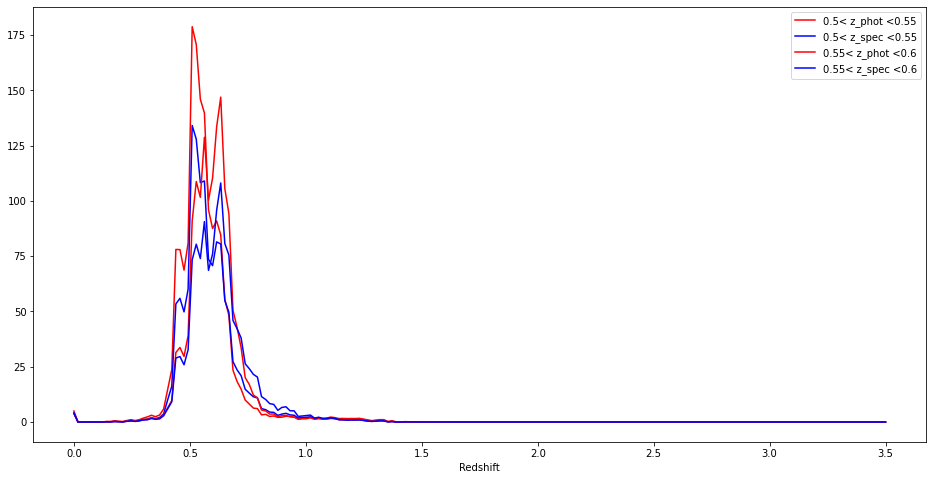

In [52]:
plt.figure(figsize=(16,8))
#plt.title("PDF Stacked with bins")
j = 0.5
for i in range(2):
    j = j + 0.05
    st1 = round(j-0.05,3)
    st2 = round(j,3)
    plt.plot(x_plot,np.sum(stack[i+1],axis = 0),label = str(st1)+"< z_phot <"+str(st2), c = "red")
    plt.plot(x_plot,np.sum(stack_spec[i+1],axis = 0),label = str(st1)+"< z_spec <"+str(st2), c = "blue")

plt.legend()
plt.xlabel("Redshift")
plt.savefig("plots/pdf_stacked_photandspec.png",dpi = 500)

In [53]:
cdf = []
for i in range(len(pdf)):
    cdf.append(np.cumsum(pdf[i,:]))

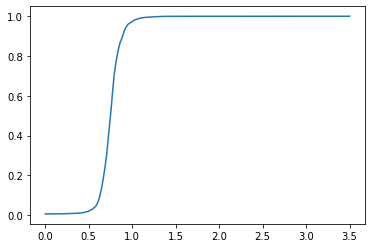

In [54]:
plt.plot(x_plot,cdf[6778])

In [55]:
def mc_cdf(cdf,bins):
    rand = np.random.random()
    ind = np.where(cdf >= rand)
    frac = (rand-cdf[ind[0][0]-1])/(cdf[ind[0][0]]-cdf[ind[0][0]-1])
    #print(frac)
    zfinal = bins[ind[0][0]-1] + frac*(bins[ind[0][0]]-bins[ind[0][0]-1])
    return zfinal,rand,cdf[ind[0][0]-1],cdf[ind[0][0]]


In [56]:
mc_cdf(cdf[0],x_plot)

(0.7758913580706109, 0.640659934178299, 0.6307121, 0.7172408)

In [57]:
mc = []
for i in range(10000):
    zfinal, rand, cdf1,cdf2 = mc_cdf(cdf[200],x_plot)
    mc.append(zfinal)

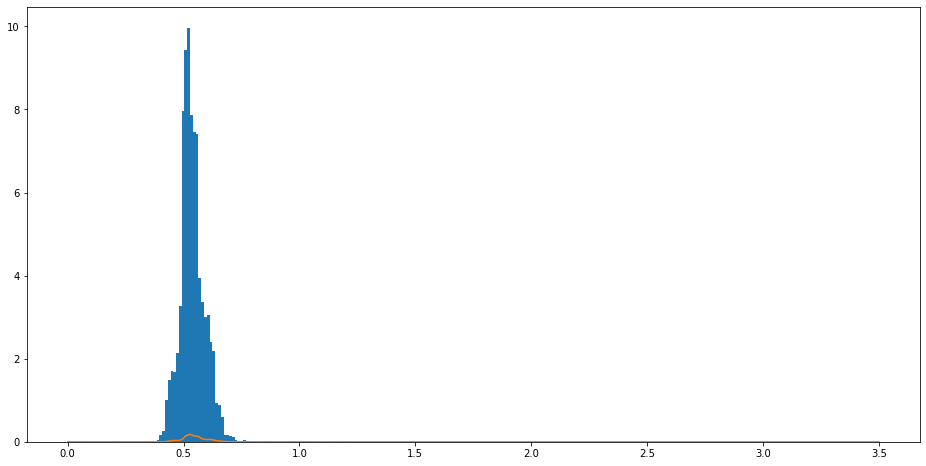

In [58]:
plt.figure(figsize=(16,8))
plt.hist(mc,bins=100,density = True);
plt.plot(x_plot, pdf[200])
plt.savefig("testes.png")

## Inverse CDF Sampling

In [59]:
from scipy.interpolate import interp1d

In [60]:
inv_cdf = interp1d(x_plot,cdf[0])

In [61]:
ys = inv_cdf(x_plot)

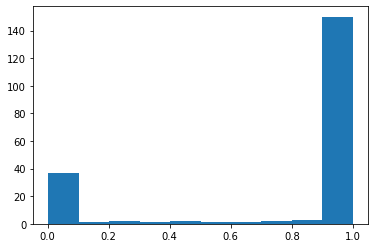

In [62]:
plt.hist(ys,bins=10);

## Create a csv file

In [63]:
final_data = pd.DataFrame()
final_data["z"] = zspec 
final_data["ann:z"] = zphot
final_data["error"] = error
final_data['MAG_AUTO_G_DERED'] = X_test[:,5]
final_data['MAG_AUTO_R_DERED'] = X_test[:,6]
final_data['MAG_AUTO_I_DERED'] = X_test[:,7]
final_data['MAG_AUTO_Z_DERED'] = X_test[:,8]
final_data['MAG_AUTO_Y_DERED'] = X_test[:,9]


In [64]:
for i in range(200):
    final_data["ann_pdf_"+str(i)] = pdf[:,i]

In [65]:
final_data

,z,ann:z,error,MAG_AUTO_G_DERED,MAG_AUTO_R_DERED,MAG_AUTO_I_DERED,MAG_AUTO_Z_DERED,MAG_AUTO_Y_DERED,ann_pdf_0,ann_pdf_1,...,ann_pdf_190,ann_pdf_191,ann_pdf_192,ann_pdf_193,ann_pdf_194,ann_pdf_195,ann_pdf_196,ann_pdf_197,ann_pdf_198,ann_pdf_199
0,0.6434,0.753039,0.109639,25.244555,22.562988,21.478390,20.953375,20.716131,0.002522,1.317058e-07,...,1.159365e-07,1.212123e-07,1.267078e-07,1.361112e-07,1.194722e-07,1.218276e-07,1.166353e-07,3.307113e-07,1.271782e-07,3.282171e-07
1,0.8002,0.960484,0.160284,22.814692,21.873016,21.133543,20.491699,19.901295,0.013537,4.872466e-06,...,4.112065e-06,4.723970e-06,4.488850e-06,4.918011e-06,4.318812e-06,4.537728e-06,4.417790e-06,1.643592e-05,4.783941e-06,1.781626e-05
2,0.6604,0.616471,-0.043929,23.995096,22.976412,22.591587,23.389984,21.575186,0.002853,1.715734e-06,...,1.730806e-06,1.572202e-06,1.797443e-06,1.568386e-06,1.798595e-06,1.699608e-06,1.612835e-06,4.636389e-06,1.856055e-06,4.656773e-06
3,0.8386,0.756354,-0.082246,24.344053,22.485346,21.329670,20.859568,20.737387,0.001408,8.307243e-08,...,7.572282e-08,7.800985e-08,8.216328e-08,8.376990e-08,7.911654e-08,7.763418e-08,7.501355e-08,1.809394e-07,8.359377e-08,1.821885e-07
4,0.6224,0.753764,0.131364,23.538017,22.996525,22.233753,22.489120,22.458166,0.002529,1.308080e-06,...,1.249755e-06,1.269957e-06,1.290448e-06,1.247257e-06,1.232014e-06,1.199064e-06,1.202637e-06,2.676858e-06,1.344781e-06,2.923876e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14293,0.5004,0.508876,0.008476,23.605679,22.377733,22.306175,21.992144,21.745090,0.003416,2.436425e-07,...,2.417552e-07,2.336028e-07,2.539858e-07,2.278161e-07,2.578561e-07,2.487371e-07,2.462109e-07,8.155217e-07,2.730630e-07,8.087995e-07
14294,0.8668,0.876159,0.009359,23.282803,22.506300,21.502583,21.279543,20.803699,0.002030,3.798893e-07,...,3.462218e-07,3.617649e-07,3.719203e-07,3.729361e-07,3.719579e-07,3.575802e-07,3.337690e-07,7.813502e-07,3.830265e-07,8.073255e-07
14295,0.5504,0.523268,-0.027132,23.497162,21.628817,20.941769,20.525417,20.479809,0.000943,5.097312e-09,...,4.574590e-09,4.793315e-09,4.778299e-09,5.026236e-09,4.627640e-09,4.945547e-09,4.722648e-09,2.007343e-08,5.064111e-09,1.987090e-08
14296,0.7572,0.609903,-0.147297,24.522919,22.927969,22.311859,22.566982,21.728472,0.003339,9.006696e-07,...,8.916991e-07,8.073419e-07,9.685378e-07,8.455056e-07,9.209633e-07,8.740910e-07,8.536302e-07,2.122574e-06,1.007710e-06,2.144097e-06


In [67]:
final_data.to_csv("ann-rafael-results.csv",index = False)